In [1]:
#Import our Dependencies
import os
import csv
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pull our DataFrame
file="clean_data.csv"
df=pd.read_csv(file)
#df = pd.read_csv("../Resources/clean_data.csv")  
df.head()

,Unnamed: 0,Title,Director,Movie Length (s),Genre,Headlining Actor,Gross,Keywords,Language,Country,Rating,Budget,Release Year,IMDB Score,Director Facebook Likes,Headlining Actor Facebook Likes,Movie Facebook Likes,Cast Facebook Likes
0,0,Avatar,James Cameron,178,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,760505847,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000,2009,7.9,0,1000,33000,4834
1,1,Pirates of the Caribbean: At World's End,Gore Verbinski,169,Action|Adventure|Fantasy,Johnny Depp,309404152,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,300000000,2007,7.1,563,40000,0,48350
2,2,Spectre,Sam Mendes,148,Action|Adventure|Thriller,Christoph Waltz,200074175,bomb|espionage|sequel|spy|terrorist,English,UK,PG-13,245000000,2015,6.8,0,11000,85000,11700
3,3,The Dark Knight Rises,Christopher Nolan,164,Action|Thriller,Tom Hardy,448130642,deception|imprisonment|lawlessness|police offi...,English,USA,PG-13,250000000,2012,8.5,22000,27000,164000,106759
4,5,John Carter,Andrew Stanton,132,Action|Adventure|Sci-Fi,Daryl Sabara,73058679,alien|american civil war|male nipple|mars|prin...,English,USA,PG-13,263700000,2012,6.6,475,640,24000,1873


In [3]:
#split up the genres that were linked with the "|"
df['Genre'] = df['Genre'].str.split('|')
df = df.explode('Genre')
df.head()

,Unnamed: 0,Title,Director,Movie Length (s),Genre,Headlining Actor,Gross,Keywords,Language,Country,Rating,Budget,Release Year,IMDB Score,Director Facebook Likes,Headlining Actor Facebook Likes,Movie Facebook Likes,Cast Facebook Likes
0,0,Avatar,James Cameron,178,Action,CCH Pounder,760505847,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000,2009,7.9,0,1000,33000,4834
0,0,Avatar,James Cameron,178,Adventure,CCH Pounder,760505847,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000,2009,7.9,0,1000,33000,4834
0,0,Avatar,James Cameron,178,Fantasy,CCH Pounder,760505847,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000,2009,7.9,0,1000,33000,4834
0,0,Avatar,James Cameron,178,Sci-Fi,CCH Pounder,760505847,avatar|future|marine|native|paraplegic,English,USA,PG-13,237000000,2009,7.9,0,1000,33000,4834
1,1,Pirates of the Caribbean: At World's End,Gore Verbinski,169,Action,Johnny Depp,309404152,goddess|marriage ceremony|marriage proposal|pi...,English,USA,PG-13,300000000,2007,7.1,563,40000,0,48350


In [4]:
#ignore irrelevant data maybe only genre and title and IMDB Score
genreDF = df[["Genre", "Title","IMDB Score"]]
genreDF.head()

,Genre,Title,IMDB Score
0,Action,Avatar,7.9
0,Adventure,Avatar,7.9
0,Fantasy,Avatar,7.9
0,Sci-Fi,Avatar,7.9
1,Action,Pirates of the Caribbean: At World's End,7.1


In [5]:
#Group by Genre
Genre_Grouped = genreDF.groupby('Genre')
Genre_Grouped.head()

,Genre,Title,IMDB Score
0,Action,Avatar,7.9
0,Adventure,Avatar,7.9
0,Fantasy,Avatar,7.9
0,Sci-Fi,Avatar,7.9
1,Action,Pirates of the Caribbean: At World's End,7.1
...,...,...,...
709,Documentary,This Is It,7.3
1663,Documentary,Winged Migration,8.0
1998,Documentary,Jackass 3D,7.1
2555,Documentary,Justin Bieber: Never Say Never,1.6


In [6]:
#Group by IMDB Score
IMDB_Grouped = genreDF.groupby('IMDB Score')
IMDB_Grouped.head()

,Genre,Title,IMDB Score
0,Action,Avatar,7.9
0,Adventure,Avatar,7.9
0,Fantasy,Avatar,7.9
0,Sci-Fi,Avatar,7.9
1,Action,Pirates of the Caribbean: At World's End,7.1
...,...,...,...
3072,Comedy,Chairman of the Board,2.3
3128,Comedy,Daddy Day Camp,2.9
3404,Comedy,Teen Wolf Too,3.2
3404,Fantasy,Teen Wolf Too,3.2


In [7]:
#How many movies in each Genre
Count = Genre_Grouped["Genre"].count()
Count.head()

Genre
Action        962
Adventure     789
Animation     198
Biography     240
Comedy       1488
Name: Genre, dtype: int64

In [8]:
#IMDB Score , Average rating per Genre
Genre_Average = Genre_Grouped.mean()
Genre_Average

,IMDB Score
Genre,
Action,6.290956
Adventure,6.452218
Animation,6.702525
Biography,7.152083
Comedy,6.184140
Crime,6.545225
Documentary,7.023077
Drama,6.782778
Family,6.211186


In [9]:
#How Many Movies share the same IMDB Score
Average = IMDB_Grouped["IMDB Score"].count()
Average

IMDB Score
1.6     2
1.9     4
2.0     2
2.1     8
2.2     3
       ..
8.8    15
8.9    10
9.0     6
9.2     2
9.3     2
Name: IMDB Score, Length: 74, dtype: int64

In [10]:
#Top 5 IMDB 
topIdf = Average.sort_values(ascending=False).nlargest(5)
topIdf.head()

IMDB Score
6.7    549
6.6    501
6.5    456
6.4    448
7.0    438
Name: IMDB Score, dtype: int64

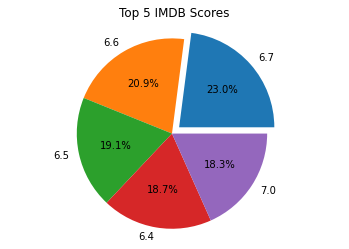

FileNotFoundError: [Errno 2] No such file or directory: '../Images/Top5IMDBScores.png'

<Figure size 432x288 with 0 Axes>

In [11]:
#Top 5 IMDB in a pie chart
my_labels = '6.7', '6.6', '6.5', '6.4', '7.0'
my_explode = (0.1, 0, 0, 0, 0)
colors = ["red", "cyan", "magenta", "green"]
plt.pie(topIdf,labels=my_labels,autopct='%1.1f%%', explode=my_explode)
plt.title('Top 5 IMDB Scores')
plt.axis('equal')
plt.show()
plt.savefig("../Images/Top5IMDBScores.png")

In [ ]:
#Top 5 Genre catergories based on IMDB Score
topGdf = Genre_Average.sort_values("IMDB Score", ascending=False)
topGenre = topGdf["IMDB Score"].nlargest(5)
topGenre.plot.bar()
plt.title("Top 5 Genre catergories based on IMDB Score")
plt.xlabel("Genre")
plt.ylabel("IMDB Score")
plt.savefig("../Images/Top5GenresvsIMDBScore.png")

In [ ]:
#top 5 Genres in Data
topdf = Count.sort_values(ascending=False).nlargest(5)
topdf.head()

In [ ]:
#Top 5 Genres in a pie chart
my_labels = 'Drama', 'Comedy', 'Thriller', 'Action', 'Romance'
my_explode = (0.1, 0, 0, 0, 0)
plt.pie(topdf,labels=my_labels,autopct='%1.1f%%', explode=my_explode)
plt.title('Top 5 Genres')
colors = ["red", "cyan", "magenta", "green"]
plt.axis('equal')
plt.show()
plt.savefig("../Images/Top5Genres.png")

In [ ]:
#Bottom 5 Genres in Data
bottomdf = Count.sort_values(ascending=False).nsmallest(5)
bottomdf


In [ ]:
#Bottom 5 Genres in a pie chart
my_labels = 'Film-Noir', 'Documentary', 'Western', 'Musical', 'History'
my_explode = (0.2, 0.1, 0.1, 0.1, 0.1)
colors = ["red", "cyan", "magenta", "green"]
plt.pie(bottomdf,labels=my_labels,autopct='%1.1f%%', explode=my_explode)
plt.title('Bottom 5 Genres')
plt.axis('equal')
plt.show()
#plt.savefig("../Images/Bottom5Genres.png")